In [13]:
from keras.datasets import mnist
from matplotlib import pyplot as plt
import pickle
import spikeGen
import population
import numpy as np
from tqdm.notebook import tqdm_notebook as tqdm
import random
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [14]:
def plot_spike_train(spike_train, title):
    i = 0
    for train in spike_train:
        train = train + i
        plt.plot(train, label='Neuron {}'.format(i))
        i += 1
    plt.title(title)
    plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    # plt.legend()
    plt.show()

In [15]:
def pop_eve(spike_train_length, population, batch_size=10, epochs = 10, resize = 0, ran = False):
    population.set_batch_size(batch_size)
    for ep in tqdm(range(epochs)):
        # print(f'\nEpoch {ep}')


        # Images to train on
        # for p in range(batch_size*ep, batch_size*ep+batch_size):
        for p in range(batch_size):
            # print(f'Image {p}')
            # Reset spike train history for all networks
            population.reset_population()

            # start = time.time()
            # TODO Generate all spike trains at once and store them in a text file ( not sure if needed )
            # Then read it in when needed
            # Genereating a spike train for image p
            if ran:
                pick = random.randint(0, len(train_X))
            else:
                pick = p
            spikeTrain = np.array(spikeGen.rateCodingRand2D(train_X[pick], T=spike_train_length, resize=resize))

            # Update the networks with the spike train
            population.update_population(spikeTrain, train_y[pick])
            # end = time.time()
            # delta = end - start
            # print(f"Image {p} took {delta} seconds to process")

        # Select the best networks
        population.evolve_population()
        # population.plot_best_network(train_y[p], ep)
    population.plot_prediction()
        # population.batch_reset()
        # population.plot_all_networks(train_y[p],ep)
        # print(population)

  0%|          | 0/10 [00:00<?, ?it/s]

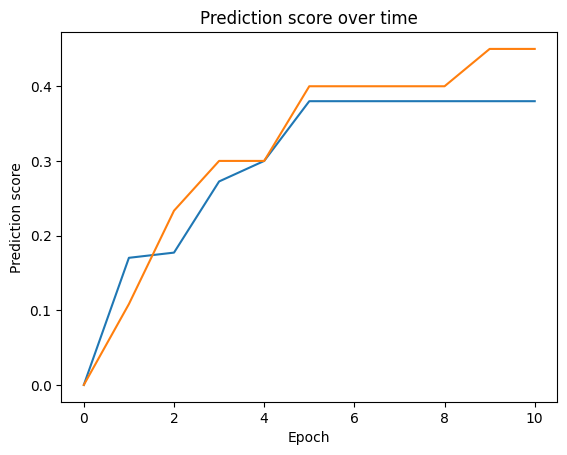

In [21]:
resize = 2
# Get total pixels in an image
nr_pix = int(train_X.shape[1]/resize * train_X.shape[2]/resize)

spike_train_length = 20

# Nr_input neurons -> number of pixels in an image
# pop = init(nr_input=nr_pix, nr_output=10, nr_hidden=10, number_of_networks=20, train_length=spike_train_length)
# evolve3(spike_train_length)
# initialize(nr_input=nr_pix, nr_hidden=20, nr_output=10, threshold=5, number_of_networks=20, leakage=0.05)
# evolve2()

# Bruker en ny måte å regne på.. Ikke implementert evolusjon enda
# n = init2(nr_input=nr_pix, nr_hidden=20, nr_output=10, threshold=5, number_of_networks=20, leakage=0.05, train_length=spike_train_length)
# evolve3(spike_train_length,n)
batch_size = 1000
pop = population.Population(nr_inputs=nr_pix, nr_hidden=[20], nr_outputs=10, size=20,
                            spike_train_length=spike_train_length, batch_size=batch_size, leakage=0.1, threshold=1.5, tournament_size=3)
pop.create_population()
pop.mutation_rate = 0.1
pop_eve(spike_train_length, pop, batch_size=10, resize=resize, ran = False)

  0%|          | 0/10 [00:00<?, ?it/s]

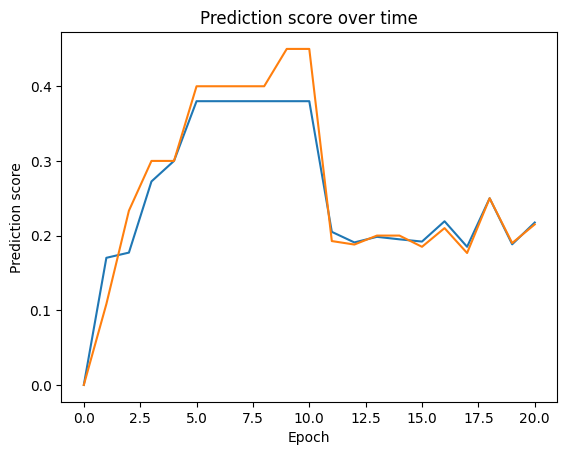

In [22]:
pop_eve(spike_train_length, pop, batch_size=100, epochs=10, resize=resize, ran = True)

  0%|          | 0/10 [00:00<?, ?it/s]

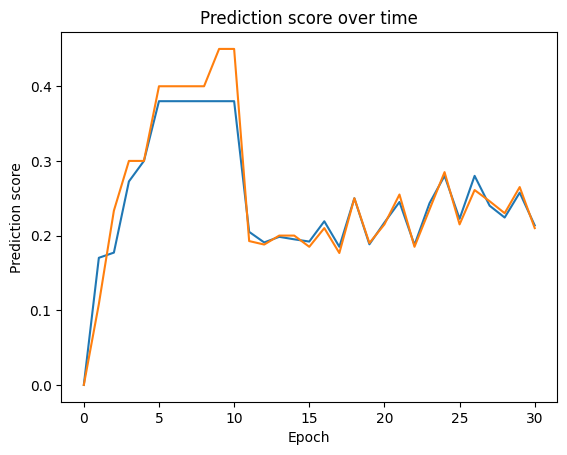

In [23]:
pop_eve(spike_train_length, pop, batch_size=100, epochs=10, resize=resize, ran = True)

In [1]:
pop.plot_best_network()

NameError: name 'pop' is not defined

  0%|          | 0/10 [00:00<?, ?it/s]

ValueError: max() arg is an empty sequence